In [2]:
import numpy as np
import pylab as pl
from IPython.display import display, clear_output
import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
np.random.seed(333)

In [4]:
random_1 = np.random.randn(2,100)

In [5]:
random_1.shape

(2, 100)

In [6]:
random_2 = np.random.randn(2,100) + 2

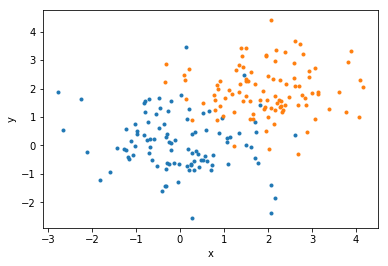

In [7]:
pl.plot(random_1[0], random_1[1], '.')
pl.plot(random_2[0], random_2[1], '.')
pl.xlabel('x')
pl.ylabel('y');

# 1. chose the number of clusters 
nclusters = 2

In [8]:
random_stack = np.hstack([random_1, random_2])

# 2. set a guess for the initial centers

In [9]:
# fix the centers to a poor initial guess
centers = np.array([[0.,-1.], [0,-2]]) 

# a better initial guess would have been
#minval, maxval = min(random_stack[0]), max(random_stack[0])
#np.array((np.random.rand(4)   * (maxval - minval)) + minval).reshape(2,2)

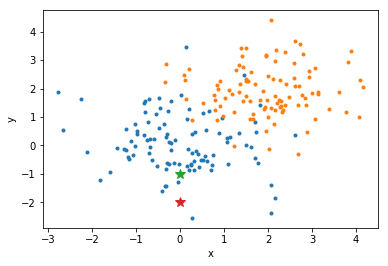

In [10]:
pl.plot(random_1[0], random_1[1], '.')
pl.plot(random_2[0], random_2[1], '.')
pl.plot(centers[0,0], centers[0,1], '*', ms=10)
pl.plot(centers[1,0], centers[1,1], '*', ms=10)
pl.xlabel('x')
pl.ylabel('y');

In [11]:
#define the distance metric - just Eucledian distance
def distmetric(x, y, center):
    distmetric = np.sqrt( (x - center[0])**2 + (y - center[1])**2)
    return distmetric

# 3. check for each point which center is closer

In [12]:
cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])

cl1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

# 4. calculate new centers

In [13]:
newc = np.array(
    [np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
        np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
print ("old center\n", centers, "\nnew center\n", newc)

old center
 [[ 0. -1.]
 [ 0. -2.]] 
new center
 [[ 0.96972306  1.06522176]
 [ 1.02400655 -2.10176012]]


# 5. iterate 3&4 till convergence

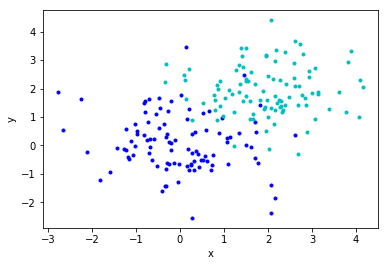

In [28]:
fig, ax = plt.subplots()
a, = ax.plot([],[],"*",markersize=10)
b, = ax.plot([],[],"*",markersize=10)
ax.set_xlabel("x")
ax.set_ylabel("y")
t1, = ax.plot(random_1[0], random_1[1], 'b.')
t2, = ax.plot(random_2[0], random_2[1], 'c.')

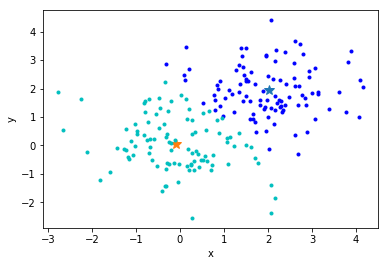

iteration: 8
old center: [[ 2.01522567  1.93589473]
 [-0.09470755  0.04900058]]
new center: [[ 2.01522567  1.93589473]
 [-0.09470755  0.04900058]]


In [29]:
iterate = 0

while((centers != newc).all()):
    
    temp1 = np.hstack([random_1[:, cl1], random_2[:, cl2]])
    temp2 = np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])
    t1.set_data(temp1[0], temp1[1])
    t2.set_data(temp2[0], temp2[1])
    
    if iterate == 0:
        a.set_data(centers[0,0], centers[0,1])
        b.set_data(centers[1,0], centers[1,1])
        display(fig)
        print ("iteration: {}".format(iterate))
        print ("center: {}".format(centers))
    
    centers = newc
    cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
    cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])

    newc = np.array(
        [np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
            np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])

    a.set_data(centers[0,0], centers[0,1])
    b.set_data(centers[1,0], centers[1,1])

    time.sleep(2)
    clear_output(wait=True)
    display(fig)
    
    iterate += 1
    print ("iteration: {}".format(iterate))
    print ("old center: {}".format(centers))
    print ("new center: {}".format(newc))